<a href="https://colab.research.google.com/github/shweta1290/pytorch/blob/main/02_Pytorch_CLassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles
#make 1000 sample
n_samples=1000
#create circle
x,y=make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
len(x),len(y)

(1000, 1000)

In [ ]:
print(f"First 5 sample of x:\n {x[:5]}")
print(f"First 5 sample of y:\n {y[:5]}")

First 5 sample of x:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 sample of y:
 [1 1 1 1 0]


In [ ]:
# Make dataframe of circle
import pandas as pd
circles=pd.DataFrame({"X1":x[:,0],"X2":x[:,1],"label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


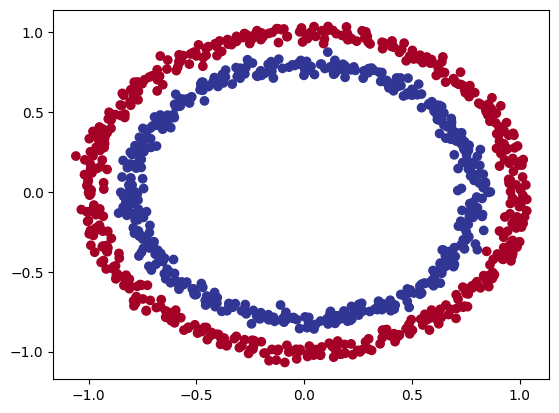

In [ ]:
 # visulaize
 import matplotlib.pyplot as plt
 plt.scatter(x=x[:,0],y=x[:,1],c=y,cmap=plt.cm.RdYlBu)

Check input and output shapes

In [ ]:
x.shape,y.shape

((1000, 2), (1000,))

In [ ]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
# View first example of features and labels
x_sample=x[0]
y_sample=y[0]
print(f"values for one sample of x:{x_sample} and y:{y_sample}")
print(f"shape of one sample of x:{x_sample.shape}")

values for one sample of x:[0.75424625 0.23148074] and y:1
shape of one sample of x:(2,)


In [ ]:
 #turn data into tensors
 import torch
 torch.__version__

'2.3.0+cu121'

In [ ]:
x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
x[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
x.dtype,y.dtype

(torch.float32, torch.float32)

Spllit in Train and test

In [ ]:
from sklearn.model_selection import train_test_split
#first train then test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
len(x_train),len(x_test)

(800, 200)

Build a model

1. Setup a device agnostic code
2. construct a model by subclassing nn.Module
3. defime lloss function and optimizer
4. Create a train and test loop

In [ ]:
import torch
from torch import nn
device="cuda" if torch.cuda.is_available()  else "cpu"
device

'cuda'

1. subclass nn.Module
2. Create 2 nn.Linear() layers capable of handlinf the shapes of our data
3. overwrite forward method
4. instantiate an instance of our model class

In [ ]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    # create linear layers capable of handling shapes of data
    self.layer1=nn.Linear(in_features=2,out_features=5)
    self.layer2=nn.Linear(in_features=5,out_features=1)
    #forward method to define computation in the model
  def forward():
    return self.layer2(self.layer1(x))
#instantiate an instance of our class
model0=CircleModel().to(device)
model0



CircleModel(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# lets replicate using nn.Sequential()
model0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4893, -0.0869],
                      [ 0.2913,  0.4724],
                      [ 0.1324,  0.2513],
                      [-0.3331, -0.5106],
                      [-0.5446,  0.3126]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.5780,  0.3152,  0.1985, -0.4339, -0.0278], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.1739,  0.0373,  0.0549, -0.0501,  0.1794]], device='cuda:0')),
             ('1.bias', tensor([-0.1757], device='cuda:0'))])

In [ ]:
with torch.inference_mode():
  untrained_preds=model0(x_test.to(device))
print(f"untrained predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\n first 10 labels :{y_test[:10]}")

untrained predictions:
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [0.]], device='cuda:0')

 first 10 labels :tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
#setup loss function and optimizer
loss_fn=nn.BCEWithLogitsLoss() # it has bui;lt in sigmoid activation function
optimizer=torch.optim.SGD(params=model0.parameters(),lr=0.1)

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  accuracy=(correct/len(y_pred))*100
  return accuracy

Train model

In [ ]:
torch.manual_seed(42)
epoch=100
x_train,x_test,y_train,y_test=x_train.to(device),x_test.to(device),y_train.to(device),y_test.to(device)
for epoch in range(epoch):
  model0.train()

  #Forward pass
  y_logits=model0(x_train.to(device)).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  # calculate loss
  loss=loss_fn(y_logits,y_train.to(device)) #order matters
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  #optimizer zero grad
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  #optimizer step
  optimizer.step()

  model0.eval()
  with torch.inference_mode():
    test_logit=model0(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logit))

    #test loss
    test_loss=loss_fn(test_logit,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

    if epoch%10==0:
      print(f"epoch:{epoch}  | train loss:{loss}  | test loss : {test_loss} | train acc:{acc} | test acc:{test_acc}")







epoch:0  | train loss:0.6947842836380005  | test loss : 0.695245623588562 | train acc:50.24999999999999 | test acc:46.0
epoch:10  | train loss:0.6944901943206787  | test loss : 0.6952232718467712 | train acc:49.625 | test acc:49.0
epoch:20  | train loss:0.6942746043205261  | test loss : 0.6952248215675354 | train acc:49.375 | test acc:52.0
epoch:30  | train loss:0.6941049098968506  | test loss : 0.6952322125434875 | train acc:49.125 | test acc:50.5
epoch:40  | train loss:0.6939656138420105  | test loss : 0.695239782333374 | train acc:49.625 | test acc:51.0
epoch:50  | train loss:0.6938482522964478  | test loss : 0.6952458024024963 | train acc:49.5 | test acc:51.0
epoch:60  | train loss:0.6937480568885803  | test loss : 0.6952502131462097 | train acc:49.5 | test acc:50.5
epoch:70  | train loss:0.6936618089675903  | test loss : 0.6952531337738037 | train acc:50.0 | test acc:50.5
epoch:80  | train loss:0.6935868859291077  | test loss : 0.6952547430992126 | train acc:49.875 | test acc:51.5

Model is not doing good we need to change it we are adding more non linearity to the model


In [ ]:
class CircleModel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1=nn.Linear(in_features=2,out_features=10)
    self.l2=nn.Linear(in_features=10,out_features=10)
    self.l3=nn.Linear(in_features=10,out_features=1)

    def forward():
      return self.l3(self.l2(self.l1(x)))
model1=CircleModel2().to(device)
model1

CircleModel2(
  (l1): Linear(in_features=2, out_features=10, bias=True)
  (l2): Linear(in_features=10, out_features=10, bias=True)
  (l3): Linear(in_features=10, out_features=1, bias=True)
)

Creating a brand new model and data

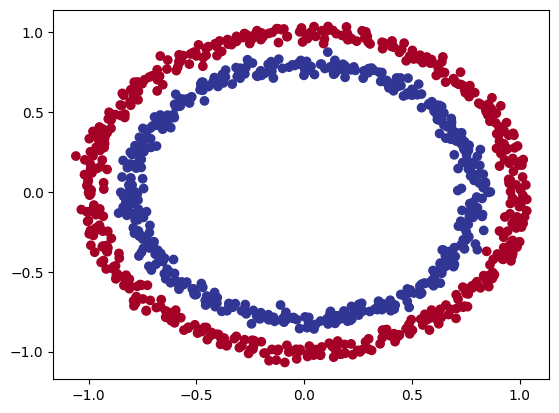

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
n_samples=1000
x,y=make_circles(n_samples,noise=0.03,random_state=42)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
#convert data to tensor anf thrn train and test
import torch
from sklearn.model_selection import train_test_split
#Turn data to tensors
x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
from torch import nn
class CircleModel3(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1=nn.Linear(in_features=2,out_features=10)
    self.l2=nn.Linear(in_features=10,out_features=10)
    self.l3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.l3(self.relu(self.l2(self.relu(self.l1(x)))))

model3=CircleModel3().to(device)


In [ ]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model3.parameters(),lr=0.1)


In [ ]:
torch.manual_seed(42)
x_train,y_train,x_test,y_test=x_train.to(device),y_train.to(device),x_test.to(device),y_test.to(device)
epochs=10000
for epoch in range(epochs):
  model3.train()
  y_logits=model3(x_train).squeeze()
  y_pres=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pres)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #TEsting
  model3.eval()
  with torch.inference_mode():
    test_logits=model3(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch%100==0:
    print(f"epoch:{epoch}  | train loss:{loss}  | test loss : {test_loss} | train acc:{acc} | test acc:{test_acc}")


epoch:0  | train loss:0.6944093704223633  | test loss : 0.6935970783233643 | train acc:50.0 | test acc:50.0
epoch:100  | train loss:0.6916211843490601  | test loss : 0.6905201077461243 | train acc:55.125 | test acc:52.5
epoch:200  | train loss:0.6907365918159485  | test loss : 0.6892173886299133 | train acc:50.875 | test acc:54.0
epoch:300  | train loss:0.6897528171539307  | test loss : 0.6877474188804626 | train acc:51.37500000000001 | test acc:56.00000000000001
epoch:400  | train loss:0.6886343955993652  | test loss : 0.6861419677734375 | train acc:51.37500000000001 | test acc:56.00000000000001
epoch:500  | train loss:0.6873275637626648  | test loss : 0.6843858361244202 | train acc:52.0 | test acc:56.00000000000001
epoch:600  | train loss:0.6857526898384094  | test loss : 0.682459831237793 | train acc:54.75 | test acc:57.49999999999999
epoch:700  | train loss:0.6837497353553772  | test loss : 0.6802805662155151 | train acc:59.75 | test acc:62.0
epoch:800  | train loss:0.6810758113861

Evaluating a model trained with non-linear activation function

In [ ]:
model3.eval()
with torch.inference_mode():
  y_preds=model3(x_test).squeeze()
  y_preds=torch.round(torch.sigmoid(y_preds))
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

## Replicating non-Linear activation function

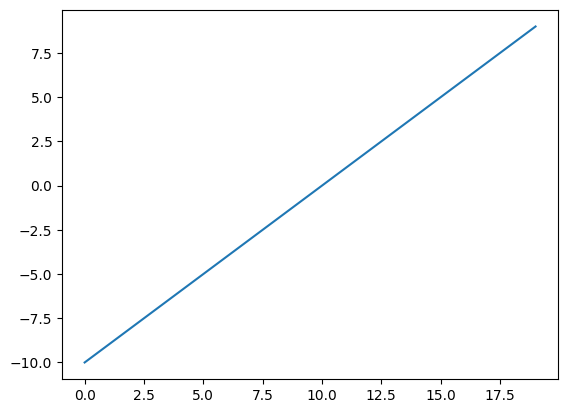

In [ ]:
A=torch.arange(-10,10,1,dtype=torch.float32)
plt.plot(A)

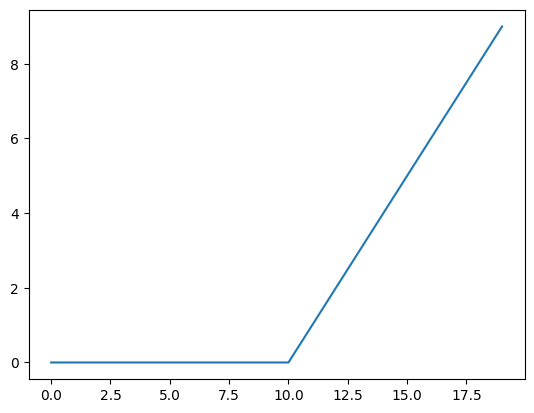

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x):
  return torch.maximum(torch.tensor(0),x)

In [ ]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

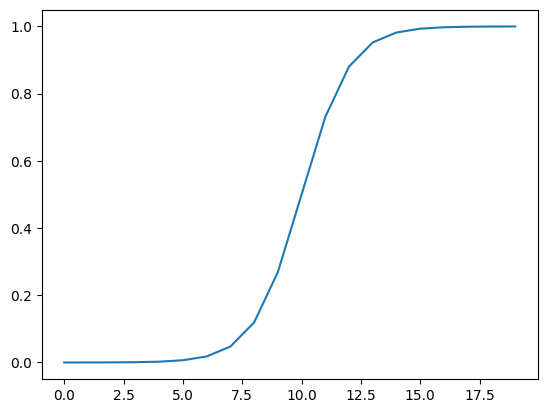

In [ ]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))
plt.plot(sigmoid(A))

## Multiclass Classification

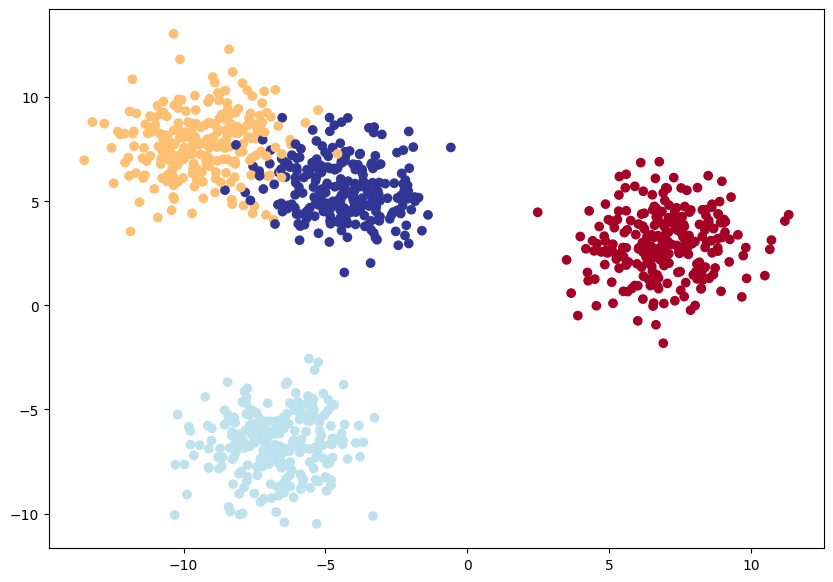

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42
x_blob,y_blob=make_blobs(n_samples=1000,n_features=NUM_FEATURES,cluster_std=1.5,centers=NUM_CLASSES)
x_blob=torch.from_numpy(x_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)
x_blob_train,x_blob_test,y_blob_train,y_blob_test=train_test_split(x_blob,y_blob,test_size=0.2,random_state=RANDOM_SEED)
plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0],x_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

## Building a multi-class classification model

In [ ]:
# create a device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"


In [ ]:
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    # initializes multi calss classification model
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)    )
  def forward(self,x):
    return self.linear_layer_stack(x)
model4=BlobModel(input_features=NUM_FEATURES,output_features=NUM_CLASSES).to(device)
model4



BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model4.parameters(),lr=0.1)

In [ ]:
next(model4.parameters()).device

device(type='cuda', index=0)

In [ ]:
model4.eval()
with torch.inference_mode():
  y_logits=model4(x_blob_test.to(device))
y_logits[:10]

tensor([[-8.2404e-01, -7.3634e-01, -1.5550e+00, -1.0525e+00],
        [-2.1932e-01, -1.2183e+00, -8.6425e-01, -2.0262e-01],
        [-1.7589e-01, -1.1152e+00, -7.8166e-01, -1.9202e-01],
        [-1.1784e+00, -8.7633e-01, -2.2298e+00, -1.5988e+00],
        [-2.7576e-01, -1.3242e+00, -1.0409e+00, -2.8540e-01],
        [-1.1111e+00, -8.4409e-01, -2.0302e+00, -1.4023e+00],
        [ 2.4321e-01, -2.4382e-01,  1.8838e-01, -2.1005e-03],
        [-1.8795e-01, -1.1396e+00, -8.1501e-01, -2.0532e-01],
        [-2.0130e-02, -7.6544e-01, -4.3632e-01, -1.0504e-01],
        [-4.4795e-02, -8.1828e-01, -4.9731e-01, -1.2509e-01]], device='cuda:0')

In [ ]:

y_blob_test[:10]

tensor([0, 1, 1, 0, 1, 0, 2, 1, 3, 3])

Creating a training and testing loops

In [ ]:
torch.manual_seed(42)
x_blob_train,y_blob_train,x_blob_test,y_blob_test=x_blob_train.to(device),y_blob_train.to(device),x_blob_test.to(device),y_blob_test.to(device)
epochs=100
for epoch in range(epochs):
  model4.train()
  #forward pass
  y_logits=model4(x_blob_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
  loss=loss_fn(y_logits,y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model4.eval()
  with torch.inference_mode():
    test_logits=model4(x_blob_test)
    test_pred=torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss=loss_fn(test_logits,y_blob_test)
    test_acc=accuracy_fn(y_true=y_blob_test,y_pred=test_pred)
  if epoch%10==0:
    print(f"epoch:{epoch}  | train loss:{loss}  | test loss : {test_loss} | train acc:{acc} | test acc:{test_acc}")



epoch:0  | train loss:1.42594575881958  | test loss : 1.2931032180786133 | train acc:2.125 | test acc:25.5
epoch:10  | train loss:0.9528605937957764  | test loss : 0.9051321148872375 | train acc:74.625 | test acc:75.5
epoch:20  | train loss:0.6393216252326965  | test loss : 0.6273072957992554 | train acc:75.25 | test acc:74.0
epoch:30  | train loss:0.5314695239067078  | test loss : 0.5240319967269897 | train acc:75.5 | test acc:75.0
epoch:40  | train loss:0.40174415707588196  | test loss : 0.39739754796028137 | train acc:82.25 | test acc:79.0
epoch:50  | train loss:0.2974821925163269  | test loss : 0.310657262802124 | train acc:89.875 | test acc:86.0
epoch:60  | train loss:0.24862410128116608  | test loss : 0.27208366990089417 | train acc:91.125 | test acc:88.5
epoch:70  | train loss:0.4394740164279938  | test loss : 0.28166911005973816 | train acc:75.625 | test acc:88.0
epoch:80  | train loss:0.23217453062534332  | test loss : 0.24697120487689972 | train acc:88.75 | test acc:89.5
epoc

Making predictions

In [ ]:
model4.eval()
with torch.inference_mode():
  y_logits=model4(x_blob_test)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
y_pred[:10],y_blob_test[:10]

(tensor([0, 1, 1, 0, 3, 0, 2, 1, 1, 3], device='cuda:0'),
 tensor([0, 1, 1, 0, 1, 0, 2, 1, 3, 3], device='cuda:0'))

## More classification metrics

* Accuracy
* Precision- ration of true positive to to predicted positives
* Recall-rario of true positive to original positives
* F1 score
* Confusion matrix
* Classification report
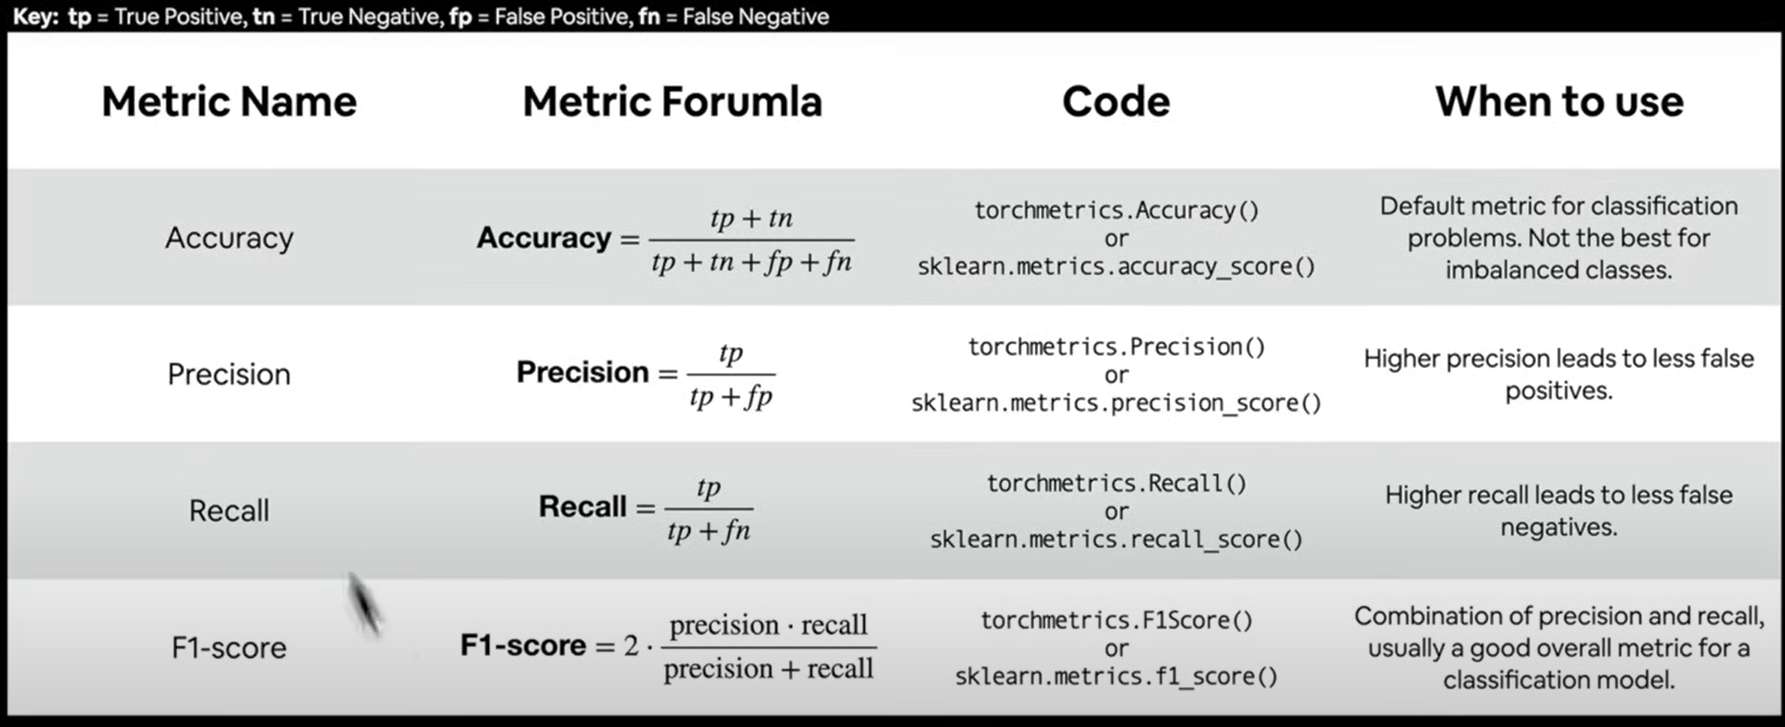

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 17.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
import torchmetrics
from torchmetrics import Accuracy
#make sure that metrics is on same device
torchmetric_accuracy=Accuracy(task="multiclass", num_classes=NUM_CLASSES).to(device)
torchmetric_accuracy(y_pred,y_blob_test)



tensor(0.8400, device='cuda:0')